### 4. Seaborn 패키지

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [29]:
iris = sns.load_dataset("iris")          # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")          # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터
mpg = sns.load_dataset('mpg')            # mile per gallon 데이터

- 1차원 분포

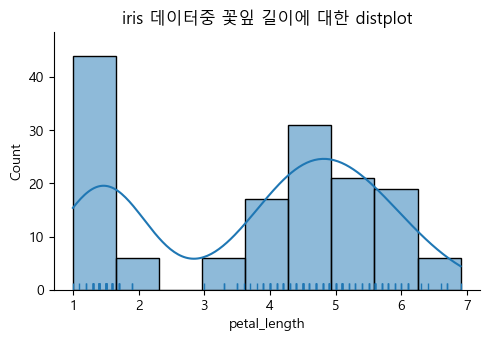

In [30]:
# displot(distribution)

#x = iris.petal_length.values
#sns.displot(x, kde=True, rug=True)
fig = sns.displot(x='petal_length', kde=True, rug=True, data=iris)
fig.fig.set_size_inches(5, 3)
plt.title('iris 데이터중 꽃잎 길이에 대한 distplot')
plt.show()

- count plot

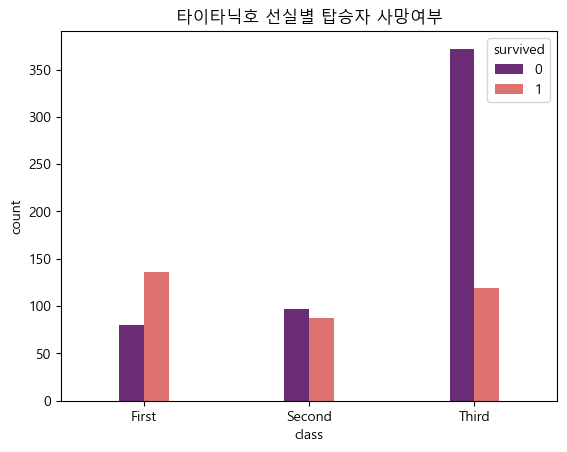

In [31]:
sns.countplot(x='class',hue='survived' ,data=titanic, width=0.3, palette='magma')        # class 데이터에 survived데이터 끼워넣기
plt.title('타이타닉호 선실별 탑승자 사망여부')
plt.show()

- 다차원 실수 데이터

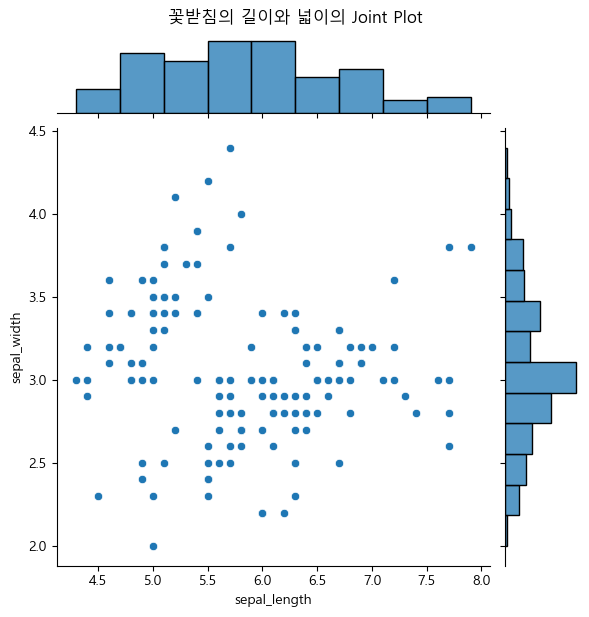

In [32]:
# joint plot
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

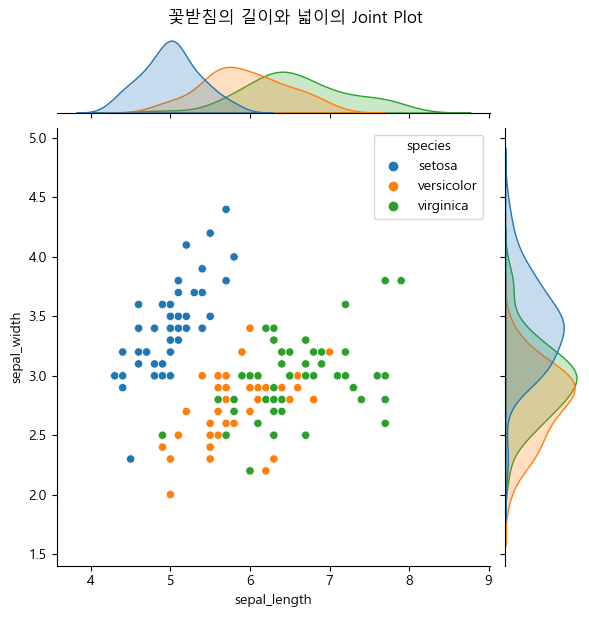

In [33]:
# joint plot(hue='iris' 포함)
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, hue='species')
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

- pair plot

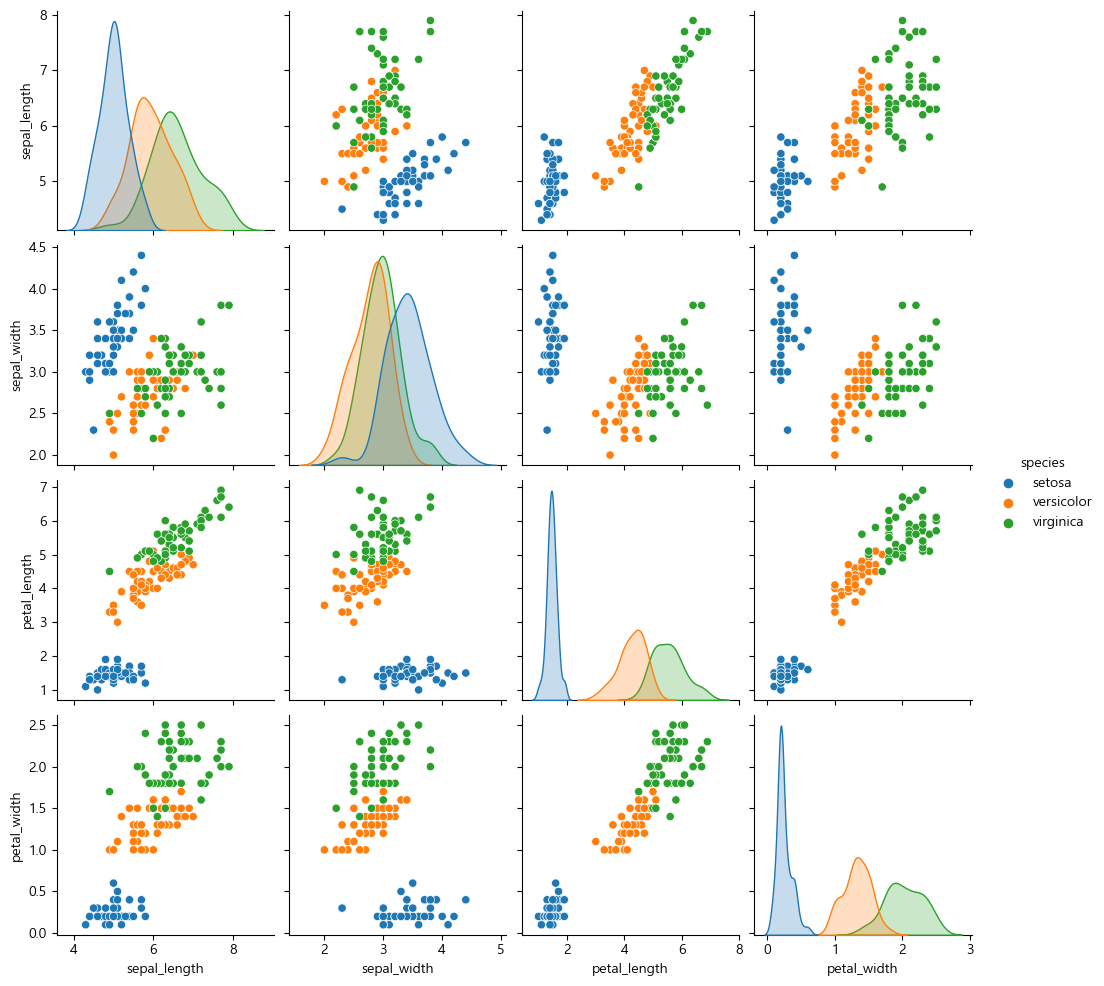

In [34]:
sns.pairplot(data=iris, hue='species');

- 다차원 카테고리 데이터

In [35]:
# heatmap
dt = titanic.pivot_table('survived', 'class', 'sex', 'count')
dt = titanic.pivot_table(values='survived', index='class', columns='sex', aggfunc='count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


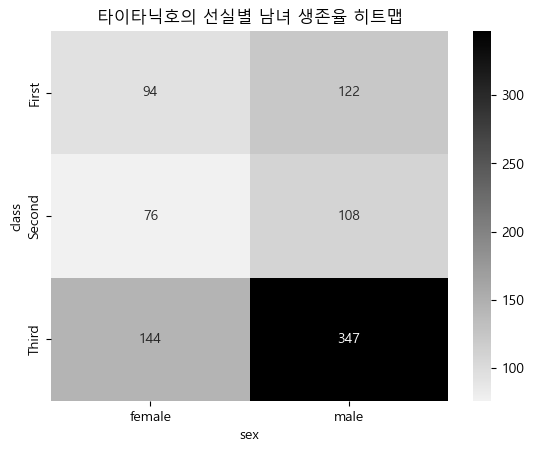

In [36]:
sns.heatmap(dt, cmap=sns.light_palette("black", as_cmap=True), annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 생존율 히트맵')
plt.show()

In [37]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


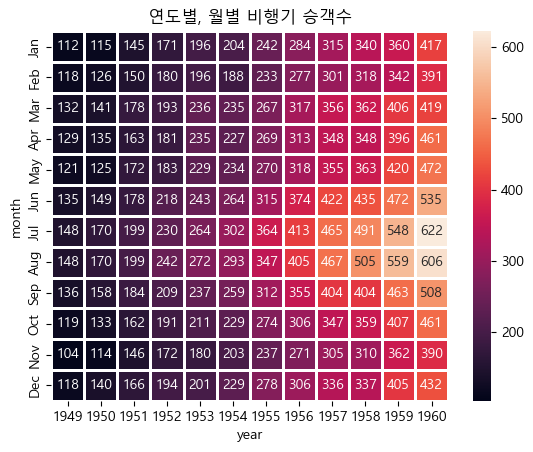

In [38]:
passengers = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(passengers, annot=True, fmt='d', linewidths=1)
plt.title('연도별, 월별 비행기 승객수');

- 다차원 복합데이터 - barplot

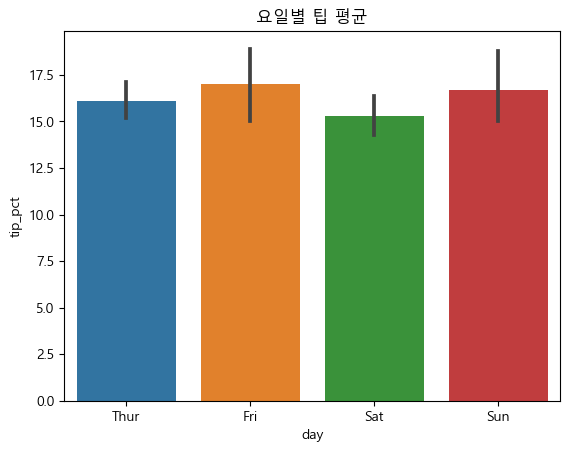

In [39]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)
sns.barplot(x='day', y='tip_pct', data=tips)
plt.title('요일별 팁 평균');

In [40]:
# mpg(mile per gallon)
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
mpg['manufacturer'] = mpg['name'].apply(lambda x: x.split()[0])
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


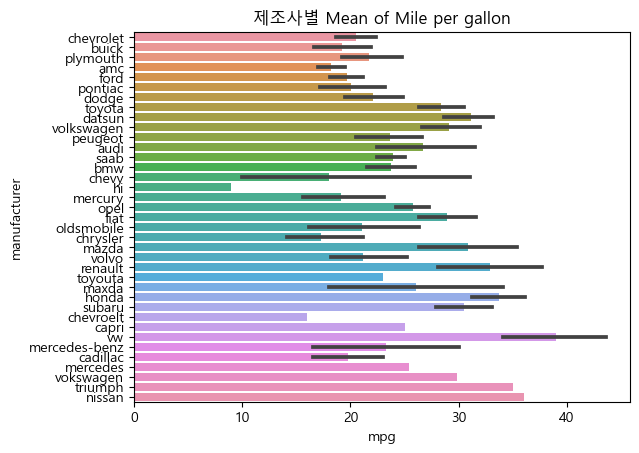

In [42]:
# x, y값 대치하면 barh와 같이 사용가능
sns.barplot(y='manufacturer', x='mpg', data=mpg)
plt.title('제조사별 Mean of Mile per gallon');

- boxplot

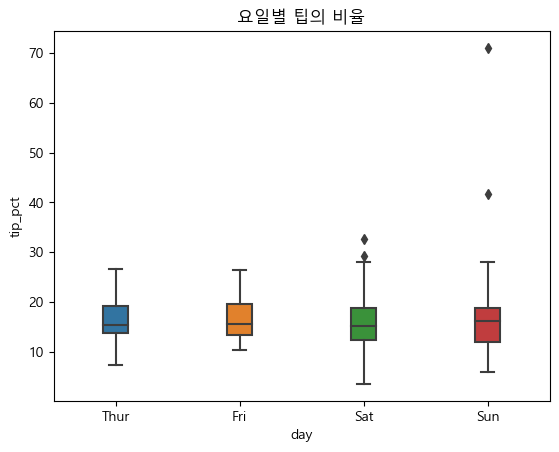

In [43]:
# 요일별 팁의 비율
sns.boxplot(x='day', y='tip_pct', data=tips, width=0.2)
plt.title('요일별 팁의 비율');

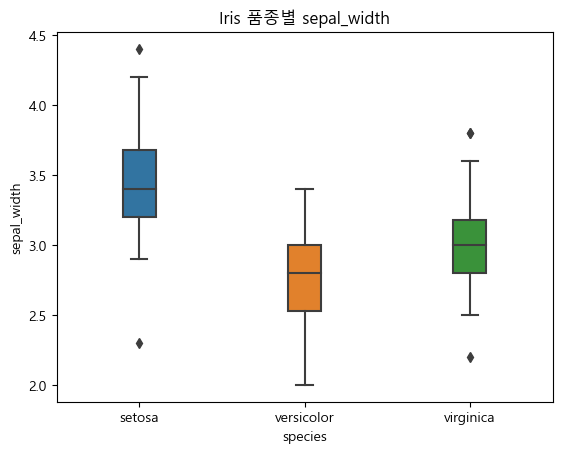

In [44]:
# iris
sns.boxplot(x='species', y='sepal_width', data=iris, width=0.2)
plt.title('Iris 품종별 sepal_width');

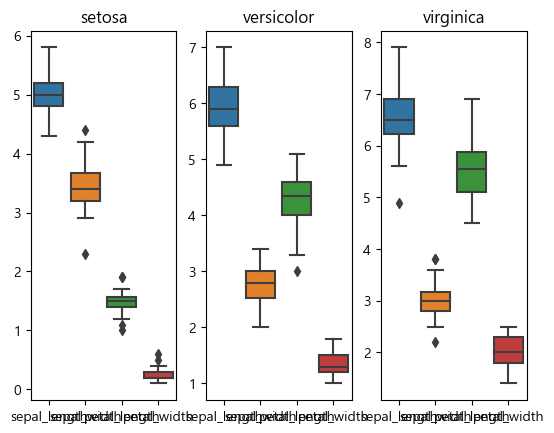

In [47]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=iris[iris.species == species])
    plt.title(species)
plt.show()

- regplot

In [48]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


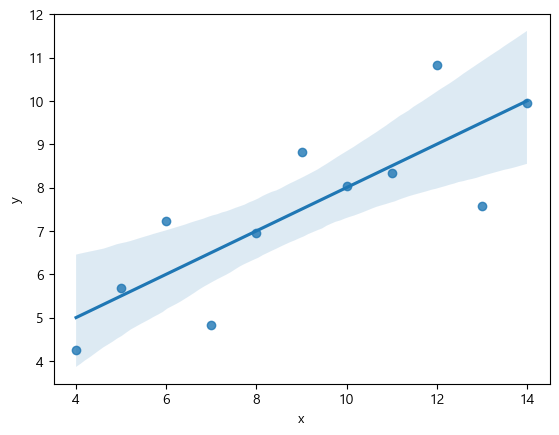

In [49]:
sns.regplot(x='x', y='y', data=ans[ans.dataset=='I']);

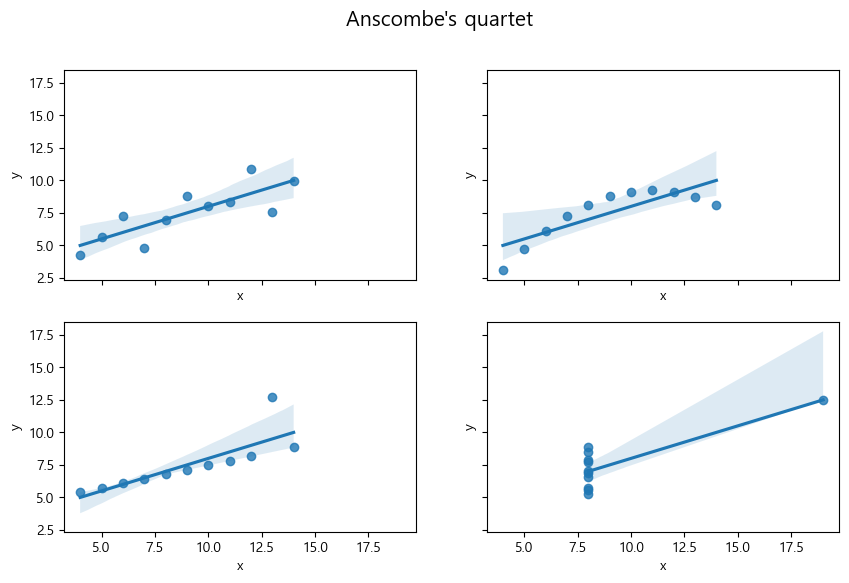

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    ax=axes[i // 2, i % 2]
    sns.regplot(x='x', y='y', data=ans[ans.dataset==roman], ax=ax)
fig.suptitle("Anscombe's quartet", fontsize=15)
plt.tight_layout
plt.show()